In [1]:
import keras
import matplotlib as plt
import pandas as pd
import numpy as np
import seaborn as sns
from keras import models
from keras import layers

In [2]:
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")
train
#SibSp = Companion bro, sis
#Parch = Companion parents, child
#Embarked = Port

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
train[['Pclass', 'Survived']].groupby(['Pclass']).mean().sort_values(by='Survived')
#one Pclass has the highest survival rate

,Survived
Pclass,
3,0.242363
2,0.472826
1,0.629630


In [4]:
train[['Sex', 'Survived']].groupby(['Sex']).mean().sort_values(by='Survived')
#The survival rate of women is overwhelmingly high

,Survived
Sex,
male,0.188908
female,0.742038


In [5]:
train[['SibSp', 'Survived']].groupby(['SibSp']).mean().sort_values(by='Survived')

,Survived
SibSp,
5,0.000000
8,0.000000
4,0.166667
3,0.250000
0,0.345395
2,0.464286
1,0.535885


In [6]:
train[['Parch', 'Survived']].groupby(['Parch']).mean().sort_values(by='Survived')

,Survived
Parch,
4,0.000000
6,0.000000
5,0.200000
0,0.343658
2,0.500000
1,0.550847
3,0.600000


In [7]:
train[['Embarked', 'Survived']].groupby(['Embarked']).mean().sort_values(by='Survived')

,Survived
Embarked,
S,0.336957
Q,0.389610
C,0.553571


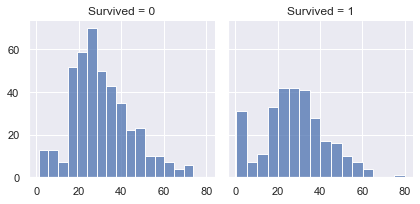

In [8]:
sns.set_theme(style="darkgrid")
g = sns.FacetGrid(train, col='Survived')
g.map_dataframe(sns.histplot, x = 'Age')
#Visualize "Age" col

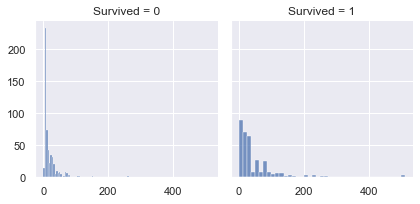

In [9]:
g = sns.FacetGrid(train, col='Survived')
g.map_dataframe(sns.histplot, x = 'Fare')
#Visualize "Fare" col
#The higher the price, the higher the survival rate

In [10]:
train.fillna(method = 'pad',inplace=True)
train.isnull().sum()
#Filling missing data use 'pad' method

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          1
Embarked       0
dtype: int64

In [11]:
train.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace = True)
#Remove useless columns

In [12]:
train['Embarked'] = train['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2}).astype(int)
train['Sex'] = train['Sex'].map({'male' : 0, 'female' : 1}).astype(int)
train['Solo'] = np.where(train['SibSp']+train['Parch'] == 0, 1, 0)
train
#'Embarked', 'Sex', 'Solo' data transpose numberical data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Solo
0,0,3,0,22.0,1,0,7.2500,0,0
1,1,1,1,38.0,1,0,71.2833,1,0
2,1,3,1,26.0,0,0,7.9250,0,1
3,1,1,1,35.0,1,0,53.1000,0,0
4,0,3,0,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,0,1
887,1,1,1,19.0,0,0,30.0000,0,1
888,0,3,1,19.0,1,2,23.4500,0,0
889,1,1,0,26.0,0,0,30.0000,1,1


In [13]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [14]:
train.loc[train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.45), 'Fare'] = 1
train.loc[(train['Fare'] > 14.45) & (train['Fare'] <= 31.0), 'Fare'] = 2
train.loc[train['Fare'] > 31.0, 'Fare'] = 3
train
#Divide the section of 'Fare' data and convert it into numberical data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Solo
0,0,3,0,22.0,1,0,0.0,0,0
1,1,1,1,38.0,1,0,3.0,1,0
2,1,3,1,26.0,0,0,1.0,0,1
3,1,1,1,35.0,1,0,3.0,0,0
4,0,3,0,35.0,0,0,1.0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,1.0,0,1
887,1,1,1,19.0,0,0,2.0,0,1
888,0,3,1,19.0,1,2,2.0,0,0
889,1,1,0,26.0,0,0,2.0,1,1


In [15]:
train['Age'].describe()

count    891.00000
mean      29.58156
std       14.55459
min        0.42000
25%       20.00000
50%       28.00000
75%       38.00000
max       80.00000
Name: Age, dtype: float64

In [16]:
train.loc[train['Age'] <= 20, 'Age'] = 0
train.loc[(train['Age'] > 20) & (train['Age'] <= 28), 'Age'] = 1
train.loc[(train['Age'] > 28) & (train['Age'] <= 38), 'Age'] = 2
train.loc[train['Age'] > 38, 'Age'] = 3
train
#Divide the section of 'Age' data and convert it into numberical data, too

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Solo
0,0,3,0,1.0,1,0,0.0,0,0
1,1,1,1,2.0,1,0,3.0,1,0
2,1,3,1,1.0,0,0,1.0,0,1
3,1,1,1,2.0,1,0,3.0,0,0
4,0,3,0,2.0,0,0,1.0,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1.0,0,0,1.0,0,1
887,1,1,1,0.0,0,0,2.0,0,1
888,0,3,1,0.0,1,2,2.0,0,0
889,1,1,0,1.0,0,0,2.0,1,1


In [17]:
train = train.astype(int)
train
#All data transpose int as astype

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Solo
0,0,3,0,1,1,0,0,0,0
1,1,1,1,2,1,0,3,1,0
2,1,3,1,1,0,0,1,0,1
3,1,1,1,2,1,0,3,0,0
4,0,3,0,2,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,0,1,0,0,1,0,1
887,1,1,1,0,0,0,2,0,1
888,0,3,1,0,1,2,2,0,0
889,1,1,0,1,0,0,2,1,1


In [18]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [19]:
test_passengerId = test['PassengerId']

test.fillna(method = 'pad',inplace=True)
test.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace = True)
test.loc[test['Age'] <= 20, 'Age'] = 0
test.loc[(test['Age'] > 20) & (test['Age'] <= 28), 'Age'] = 1
test.loc[(test['Age'] > 28) & (test['Age'] <= 38), 'Age'] = 2
test.loc[test['Age'] > 38, 'Age'] = 3
test.loc[test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.45), 'Fare'] = 1
test.loc[(test['Fare'] > 14.45) & (test['Fare'] <= 31.0), 'Fare'] = 2
test.loc[test['Fare'] > 31.0, 'Fare'] = 3
test['Embarked'] = test['Embarked'].map({'S' : 0, 'C' : 1, 'Q' : 2})
test['Sex'] = test['Sex'].map({'male' : 0, 'female' : 1})
test['Solo'] = np.where(test['SibSp']+test['Parch'] == 0, 1, 0)
test = test.astype(int)
test

#Save the 'PassengerId' column in test data, and it gives the same operation as train data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Solo
0,3,0,2,0,0,0,2,1
1,3,1,3,1,0,0,0,0
2,2,0,3,0,0,1,2,1
3,3,0,1,0,0,1,0,1
4,3,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...
413,3,0,1,0,0,1,0,1
414,1,1,3,0,0,3,1,1
415,3,0,3,0,0,0,0,1
416,3,0,3,0,0,1,0,1


In [20]:
train_data = train.drop('Survived',axis = 1)
train_label = train['Survived']
test_data = test
print(train_data.shape, train_label.shape, test_data.shape)
#And, divide train_data, train_label, test_data

(891, 8) (891,) (418, 8)


In [21]:
model = models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(891,8)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
#Stack layers Use models.Sequnetial
#relu->relu->relu->sigmoid(because binary classification)

In [22]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy',metrics = ['accuracy'])
model.fit(train_data,train_label,epochs = 100,batch_size = 128)
#And start ML as compile, fit method

Epoch 1/100
7/7 [==============================] - 0s 831us/step - loss: 0.6642 - accuracy: 0.6700
Epoch 2/100
7/7 [==============================] - 0s 831us/step - loss: 0.6334 - accuracy: 0.6453
Epoch 3/100
7/7 [==============================] - 0s 831us/step - loss: 0.6132 - accuracy: 0.6274
Epoch 4/100
7/7 [==============================] - 0s 665us/step - loss: 0.5933 - accuracy: 0.6364
Epoch 5/100
7/7 [==============================] - 0s 831us/step - loss: 0.5787 - accuracy: 0.6476
Epoch 6/100
7/7 [==============================] - 0s 807us/step - loss: 0.5657 - accuracy: 0.6678
Epoch 7/100
7/7 [==============================] - 0s 665us/step - loss: 0.5563 - accuracy: 0.7071
Epoch 8/100
7/7 [==============================] - 0s 827us/step - loss: 0.5468 - accuracy: 0.7340
Epoch 9/100
7/7 [==============================] - 0s 661us/step - loss: 0.5381 - accuracy: 0.7565
Epoch 10/100
7/7 [==============================] - 0s 669us/step - loss: 0.5305 - accuracy: 0.7677
Epoch 11/

Epoch 77/100
7/7 [==============================] - 0s 665us/step - loss: 0.4008 - accuracy: 0.8316
Epoch 78/100
7/7 [==============================] - 0s 997us/step - loss: 0.3987 - accuracy: 0.8305
Epoch 79/100
7/7 [==============================] - 0s 831us/step - loss: 0.3985 - accuracy: 0.8272
Epoch 80/100
7/7 [==============================] - 0s 997us/step - loss: 0.3999 - accuracy: 0.8328
Epoch 81/100
7/7 [==============================] - 0s 665us/step - loss: 0.3970 - accuracy: 0.8328
Epoch 82/100
7/7 [==============================] - 0s 831us/step - loss: 0.3968 - accuracy: 0.8305
Epoch 83/100
7/7 [==============================] - 0s 714us/step - loss: 0.3966 - accuracy: 0.8384
Epoch 84/100
7/7 [==============================] - 0s 831us/step - loss: 0.3961 - accuracy: 0.8373
Epoch 85/100
7/7 [==============================] - 0s 825us/step - loss: 0.3962 - accuracy: 0.8339
Epoch 86/100
7/7 [==============================] - 0s 835us/step - loss: 0.3950 - accuracy: 0.8316


In [23]:
test_label = model.predict(test_data)
test_label

array([[6.02950454e-02],
       [5.03821254e-01],
       [5.04005849e-02],
       [1.03158504e-01],
       [4.89793390e-01],
       [1.30405575e-01],
       [7.73611546e-01],
       [3.21352452e-01],
       [7.70925403e-01],
       [4.82873619e-02],
       [9.93452370e-02],
       [3.07401478e-01],
       [9.58379090e-01],
       [8.85478556e-02],
       [9.59896088e-01],
       [9.01250482e-01],
       [1.01552069e-01],
       [1.71590120e-01],
       [4.23824877e-01],
       [6.57157004e-01],
       [4.98973817e-01],
       [2.01501995e-01],
       [9.46515441e-01],
       [4.42373931e-01],
       [8.05656612e-01],
       [3.78623009e-02],
       [9.61409450e-01],
       [1.71590120e-01],
       [3.07401478e-01],
       [3.95876169e-02],
       [8.85478854e-02],
       [1.03884190e-01],
       [5.04150212e-01],
       [5.04150212e-01],
       [5.24411738e-01],
       [1.23822629e-01],
       [5.46802998e-01],
       [4.56557155e-01],
       [1.03158504e-01],
       [2.00220287e-01],


In [24]:
test_predict = pd.DataFrame(test_label,columns=['Survived'])
test_predict.index = test_passengerId
test_predict
#Convert to a DataFrame for submitting data

,Survived
PassengerId,
892,0.060295
893,0.503821
894,0.050401
895,0.103159
896,0.489793
...,...
1305,0.103159
1306,0.971551
1307,0.031468


In [25]:
test_predict['Survived'] = np.where(test_predict >= 0.5, 1, 0)
#If test_predict value >=0.5, convert 1, else convert 0

In [26]:
test_predict.to_csv('test_predict.csv')
#So, i make Survived predict csv file as keras